<h1>Preparacion de Datos Proyecto 2</h1>
<h2>Grupo 5</h2>


<h3>Contexto</h3>

El objetivo del proyecto es utilizar datos recopilados de encuestas realizadas en los años 2017 y 2021 para ayudar a funcionarios de salud y administradores de instituciones médicas en Bogotá a comprender mejor los patrones de enfermedades en la población. Esto permitirá identificar las acciones necesarias para mejorar la calidad de vida de las personas afectadas y, en el futuro, expandir estas iniciativas a otras ciudades y municipios de Colombia. El proyecto implica el desarrollo de herramientas de análisis visual, como tableros de control, adaptados a las necesidades específicas de diferentes roles dentro de las organizaciones. Además, se automatizará el proceso de recopilación, transformación y almacenamiento de datos en un repositorio centralizado para facilitar el acceso y la presentación de información relevante.

Nosotros escogimos puntos de análisis que profundizan en diferentes aspectos relacionados con las enfermedades mentales. En primer lugar, se examina la prevalencia de estas enfermedades entre distintos grupos socioeconómicos, lo que puede indicar la necesidad de intervenciones específicas para abordar posibles disparidades en salud mental. Seguidamente, se evalúa la correlación entre las condiciones de vida, como la calidad de la salud, la seguridad del entorno y la presencia de servicios básicos, y la salud mental, resaltando la influencia de políticas de vivienda y desarrollo urbano en la promoción de la salud mental. Además, se analizan las tendencias temporales en la incidencia de estas enfermedades.

<h3>Descripción de los Datos</h3>

En cuanto a los datos de salud, nos guiamos por los expertos para escoger las variables relevantes para el análisis descrito previamente, estas comprenden entre otras, relacionar el estado de la salud mental de las personas con las capacidades motrices (limitaciones, impedimentos o descriptores de este tipo). 

Según las expertas, las enfermedades mentales como la depresión y la ansiedad pueden afectar la capacidad de una persona para realizar actividades diarias, incluyendo el uso de sus brazos o manos, hablar, relacionarse con otros y realizar tareas básicas de cuidado personal como bañarse, vestirse y alimentarse. Por lo tanto, estas preguntas permiten identificar posibles conexiones entre la salud mental y las limitaciones motoras, lo que es fundamental para comprender completamente la salud integral de un individuo y diseñar intervenciones de apoyo adecuadas.

Una vez se tuvo definido en enfoque a tomar, revisamos las preguntas en ambos diccionarios de datos, pues varias de ellas cambiaron códigos de identificación entre 2017 y 2021. 

Posteriormente, identificamos la totalidad de datos para cada una de los años, los cuales son de 319952 para 2017 y 292281 para 2021.

Para este analisis en particular se escogieron las siguientes variables del apartado de salud 2017 (Cap F): NPCFP13B, NPCFP14H, NPCFP21A, NPCFP21B, NPCFP21E, NPCFP21G, NPCFP21H. 

En cuanto a los datos de demografía de 2017 que nos describen "Departamento, Municipio, Nombre localidad, Código de UPZ, Estrato socioeconómico y Sexo" se escogieron las variables: NPCEP13A, NPCEP13B, LOCALIDAD_TEX, COD_UPZ, NVCBP11AA, NPCEP5. (Cap. A, Cap. B y Cap. E)

Las variables para el apartado de salud de 2021 (Cap F) fueron: NPCFP13F, NPCFP14C, NPCFP21A1, NPCFP21A2, NPCFP21A5, NPCFP21A7, NPCFP21A8.

Y las que describieron el apartado de demografía fueron: DPTO, MPIO, NOMBRE_LOCALIDAD, COD_UPZ_GRUPO, NOMBRE_UPZ_GRUPO, ESTRATO2021, SEXO. Estas variables representan "Departamento, Municipio, Nombre localidad, Código de UPZ, Estrato socioeconómico y Sexo" respectivamente. 

Posteriormente se describen a detalle cada una de las variables una vez se realiza la limpieza y preparación de datos

<h4> 0. Carga de librerías necesarias para implementación y carga de datos</h4>

In [2]:
import os

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import ydata_profiling as pp

from sklearn.cluster import AgglomerativeClustering

import seaborn as sns; sns.set()  # for plot styling

from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.preprocessing import MinMaxScaler

from sklearn import metrics

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder



from ydata_profiling import ProfileReport

from matplotlib import cm

import warnings
# Ignorar la advertencia RuntimeWarning
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", message="The figure layout has changed to tight", category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", message="The default value of `n_init` will change from 10 to 'auto' in 1.4.", category=FutureWarning)

<strong><h4>1. Entendimiento y descripción de los datos</h4></strong>

Para entender los datos y teniendo en cuenta la cantidad de datos para 2017 (319952), decidimos revisar la calidad de los datos, al análizar los datos faltantes, el porcentaje de datos distintos y la naturaleza de las variables (categóricas o no).

A continuación se muestra lo encontrado en este aspecto.

In [4]:
#Descripcion datos 2017 Salud
data = {
    'Variable': ['NPCFP1', 'NPCFP12', 'NPCFP14C', 'NPCFP14H', 'NPCFP13B', 'NPCFP21A', 'NPCFP21B', 'NPCFP21E', 'NPCFP21H', 'NPCFP21G'],
    'Distinct': [3, 5, 2, 2, 2, 2, 2, 2, 2, 2],
    'Distinct (%)': ['< 0.1%', '< 0.1%', '< 0.1%', '< 0.1%', '< 0.1%', '< 0.1%', '< 0.1%', '< 0.1%', '< 0.1%', '< 0.1%'],
    'Missing': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'Missing (%)': ['0%', '0%', '0%', '0%', '0%', '0%', '0%', '0%', '0%', '0%']
}

# Crear un DataFrame con los datos
datosSalud2017 = pd.DataFrame(data)

datosSalud2017

Variable  Distinct Distinct (%)  Missing Missing (%)
0    NPCFP1         3       < 0.1%        0          0%
1   NPCFP12         5       < 0.1%        0          0%
2  NPCFP14C         2       < 0.1%        0          0%
3  NPCFP14H         2       < 0.1%        0          0%
4  NPCFP13B         2       < 0.1%        0          0%
5  NPCFP21A         2       < 0.1%        0          0%
6  NPCFP21B         2       < 0.1%        0          0%
7  NPCFP21E         2       < 0.1%        0          0%
8  NPCFP21H         2       < 0.1%        0          0%
9  NPCFP21G         2       < 0.1%        0          0%

Es importante entender de qué se trata cada columna y si son coherentes las columnas propuestas a las que realmente se tiene, por lo tanto, para entender los datos de mejor forma, es se busca entender qué significa cada uno de estos con el diccionario proporcionado.

In [8]:
pd.set_option('display.max_colwidth', None)
data = {
    'Variable': ['NPCFP1', 'NPCFP12', 'NPCFP13B', 'NPCFP14H', 'NPCFP21A', 'NPCFP21B', 'NPCFP21E', 'NPCFP21G', 'NPCFP21H'],
    'Significado': [
        "¿Está afiliado/a (cotizante o beneficiario/a) a alguna entidad de seguridad social en salud? (Entidad Promotora de Salud (EPS), Entidad Promotora de Salud del régimen Subsidiado (EPS-S), entidades de regímenes de excepción o especial)",
        "El estado de salud de la persona en general es:",
        "Sin estar enfermo(a) y por prevención, ¿consulta al menos una vez al año en medicina especializada?",
        "¿A la persona le han diagnosticado alguna de estas enfermedades o problemas de salud: Enfermedades mentales, trastornos de la conciencia (depresión, ansiedad)?",
        "¿A la persona le han diagnosticado alguna de estas enfermedades o problemas de salud: Enfermedades mentales, trastornos de la conciencia (depresión, ansiedad)?",
        "¿Tiene alguna limitación permanente para: Usar sus brazos o manos?",
        "¿Tiene alguna limitación permanente para: Hablar?",
        "¿Tiene alguna limitación permanente para: Relacionarse con otras personas por problemas mentales o emocionales?",
        "¿Tiene alguna limitación permanente para: Bañarse, vestirse, alimentarse sin ayuda de alguien más?"
    ]
}

diccionarioSalud2017 = pd.DataFrame(data)

diccionarioSalud2017

Variable  \
0    NPCFP1   
1   NPCFP12   
2  NPCFP13B   
3  NPCFP14H   
4  NPCFP21A   
5  NPCFP21B   
6  NPCFP21E   
7  NPCFP21G   
8  NPCFP21H   

                                                                                                                                                                                                                                  Significado  
0  ¿Está afiliado/a (cotizante o beneficiario/a) a alguna entidad de seguridad social en salud? (Entidad Promotora de Salud (EPS), Entidad Promotora de Salud del régimen Subsidiado (EPS-S), entidades de regímenes de excepción o especial)  
1                                                                                                                                                                                             El estado de salud de la persona en general es:  
2                                                                                                                                         Sin estar enfermo(a) y por prevención, ¿consulta al menos una vez al año en medicina especializada?  
3                                                                             ¿A la persona le han diagnosticado alguna de estas enfermedades o problemas de salud: Enfermedades mentales, trastornos de la conciencia (depresión, ansiedad)?  
4                                                                             ¿A la persona le han diagnosticado alguna de estas enfermedades o problemas de salud: Enfermedades mentales, trastornos de la conciencia (depresión, ansiedad)?  
5                                                                                                                                                                          ¿Tiene alguna limitación permanente para: Usar sus brazos o manos?  
6                                                                                                                                                                                           ¿Tiene alguna limitación permanente para: Hablar?  
7                                                                                                                             ¿Tiene alguna limitación permanente para: Relacionarse con otras personas por problemas mentales o emocionales?  
8                                                                                                                                          ¿Tiene alguna limitación permanente para: Bañarse, vestirse, alimentarse sin ayuda de alguien más?

En este punto, se habló con las expertas del departamento de medicina para que confirmaran la calidad y el interés en las preguntas y proceder con el desarrollo. 

Posteriormente se continúa revisando los datos demográficos, empezando por educación, pasando por estrato y sexo, entre otras variables. 

In [10]:
#Datos de Demografía 
data_combined = {
    'Variable': ['NPCHP4', 'DIRECTORIO', 'DPTOMPIO', 'CLASE', 'FEX_C', 'LOCALIDAD_TEX', 'NVCBP11AA', 'NPCEP5', 'NPCEP13A', 'NPCEP13B', 'COD_UPZ'],
    'Distinct': [16, 107218, 38, 3, 33342, 22, 10, 3, 34, 794, 91],
    'Distinct (%)': ['< 0.1%', '100%', '< 0.1%', '< 0.1%', '31,1%', '< 0.1%', '< 0.1%', '< 0.1%', '< 0.1%', '0.2%', '0,10%'],
    'Missing': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'Missing (%)': ['0%', '0%', '0%', '0%', '0%', '0%', '0%', '0%', '0%', '0%', '0%']
}

df_demografia = pd.DataFrame(data_combined)

df_demografia

Variable  Distinct Distinct (%)  Missing Missing (%)
0          NPCHP4        16       < 0.1%        0          0%
1      DIRECTORIO    107218         100%        0          0%
2        DPTOMPIO        38       < 0.1%        0          0%
3           CLASE         3       < 0.1%        0          0%
4           FEX_C     33342        31,1%        0          0%
5   LOCALIDAD_TEX        22       < 0.1%        0          0%
6       NVCBP11AA        10       < 0.1%        0          0%
7          NPCEP5         3       < 0.1%        0          0%
8        NPCEP13A        34       < 0.1%        0          0%
9        NPCEP13B       794         0.2%        0          0%
10        COD_UPZ        91        0,10%        0          0%

Una vez más, queremos entender lo que significan cada una de estas variables por lo que usamos el siguiente diccionario:

In [12]:
data = {
    'Variable': ['NPCHP4', 'DIRECTORIO', 'CLASE', 'FEX_C', 'NPCEP13A', 'NPCEP13B', 'LOCALIDAD_TEX', 'COD_UPZ', 'NVCBP11AA', 'NPCEP5'],
    'Descripción': [
        '¿Cuál es el nivel educativo más alto alcanzado por ... y el último año o grado aprobado en este nivel?',
        'DIRECTORIO',
        'CLASE',
        'Factor de expansión',
        'Departamento',
        'Municipio',
        'Nombre localidad',
        'Código de UPZ',
        'Estrato socioeconómico',
        'Sexo'
    ]
}

diccionarioDemografia2017 = pd.DataFrame(data)

diccionarioDemografia2017

Variable  \
0         NPCHP4   
1     DIRECTORIO   
2          CLASE   
3          FEX_C   
4       NPCEP13A   
5       NPCEP13B   
6  LOCALIDAD_TEX   
7        COD_UPZ   
8      NVCBP11AA   
9         NPCEP5   

                                                                                              Descripción  
0  ¿Cuál es el nivel educativo más alto alcanzado por ... y el último año o grado aprobado en este nivel?  
1                                                                                              DIRECTORIO  
2                                                                                                   CLASE  
3                                                                                     Factor de expansión  
4                                                                                            Departamento  
5                                                                                               Municipio  
6                                                                                        Nombre localidad  
7                                                                                           Código de UPZ  
8                                                                                  Estrato socioeconómico  
9                                                                                                    Sexo

En este punto y al revisar los datos, nos damos cuenta que no tenemos porcentajes de faltantes relevantes en las preguntas seleccionadas. Es por esto que procedemos con el análisis de los datos de 2021, los cuales contienen 292281 registros. 

In [13]:
data_salud_2021 = {
    'Variable': ['NPCFP1', 'NPCFP12', 'NPCFP13F', 'NPCFP14C', 'NPCFP21A1', 'NPCFP21A2', 'NPCFP21A5', 'NPCFP21A6', 'NPCFP21A7', 'NPCFP21A8', 'NPCFP33G'],
    'Distinct': [3, 5, 2, 2, 4, 4, 4, 4, 4, 4, 2],
    'Distinct (%)': ['< 0.1%', '< 0.1%', '< 0.1%', '< 0.1%', '< 0.1%', '< 0.1%', '< 0.1%', '< 0.1%', '< 0.1%', '< 0.1%', '< 0.1%'],
    'Missing': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'Missing (%)': ['0%', '0%', '0%', '0%', '0%', '0%', '0%', '0%', '0%', '0%', '0%']
}

df_salud_2021 = pd.DataFrame(data_salud_2021)

df_salud_2021

Variable  Distinct Distinct (%)  Missing Missing (%)
0      NPCFP1         3       < 0.1%        0          0%
1     NPCFP12         5       < 0.1%        0          0%
2    NPCFP13F         2       < 0.1%        0          0%
3    NPCFP14C         2       < 0.1%        0          0%
4   NPCFP21A1         4       < 0.1%        0          0%
5   NPCFP21A2         4       < 0.1%        0          0%
6   NPCFP21A5         4       < 0.1%        0          0%
7   NPCFP21A6         4       < 0.1%        0          0%
8   NPCFP21A7         4       < 0.1%        0          0%
9   NPCFP21A8         4       < 0.1%        0          0%
10   NPCFP33G         2       < 0.1%        0          0%

Una vez mas, podemos observar que el porcentaje de variables con datos faltantes es muy bajo, lo que es bueno. Proseguimos a revisar el diccionario de datos para identificar las variables y entender el contexto en el que se desarrollan. 

In [14]:
descripcion_variables = {
    'NPCFP1': '¿... está afiliado/a (cotizante o beneficiario/a) a alguna entidad de seguridad social en salud? (Entidad Promotora de Salud (EPS), Entidad Promotora de Salud del régimen Subsidiado (EPS-S), entidades de regímenes de excepción o especial)',
    'NPCFP12': 'El estado de salud de ... en general es:',
    'NPCFP13F': 'Sin estar enfermo/a y por prevención, ¿... por lo menos una vez al AÑO, consulta? (5. Psicología)',
    'NPCFP14C': '¿A ... le han diagnosticado alguna de estas enfermedades o problemas de salud: 3. Enfermedades mentales o del comportamiento (depresión, ansiedad, esquizofrenia, trastorno bipolar, alzheimer)?',
    'NPCFP21A1': '¿Dada su condición física y mental, en su vida diaria ¿... tiene dificultades para realizar las siguientes actividades: 1. Mover el cuerpo, caminar o subir y bajar escaleras?',
    'NPCFP21A2': '¿Dada su condición física y mental, en su vida diaria ¿... tiene dificultades para realizar las siguientes actividades: 2. Agarrar, mover objetos o usar sus brazos o manos?',
    'NPCFP21A5': '¿Dada su condición física y mental, en su vida diaria ¿... tiene dificultades para realizar las siguientes actividades: 5. Hablar o conversar?',
    'NPCFP21A7': '¿Dada su condición física y mental, en su vida diaria ¿... tiene dificultades para realizar las siguientes actividades: 7. Relacionarse o interactuar con las demás personas?',
    'NPCFP21A8': '¿Dada su condición física y mental, en su vida diaria ¿... tiene dificultades para realizar las siguientes actividades: 8. Comer, vestirse o bañarse por si mismo(a)?'
}

df_descripcion_variables = pd.DataFrame(list(descripcion_variables.items()), columns=['Variable', 'Descripción'])

df_descripcion_variables

Variable  \
0     NPCFP1   
1    NPCFP12   
2   NPCFP13F   
3   NPCFP14C   
4  NPCFP21A1   
5  NPCFP21A2   
6  NPCFP21A5   
7  NPCFP21A7   
8  NPCFP21A8   

                                                                                                                                                                                                                                      Descripción  
0  ¿... está afiliado/a (cotizante o beneficiario/a) a alguna entidad de seguridad social en salud? (Entidad Promotora de Salud (EPS), Entidad Promotora de Salud del régimen Subsidiado (EPS-S), entidades de regímenes de excepción o especial)  
1                                                                                                                                                                                                        El estado de salud de ... en general es:  
2                                                                                                                                               Sin estar enfermo/a y por prevención, ¿... por lo menos una vez al AÑO, consulta? (5. Psicología)  
3                                                ¿A ... le han diagnosticado alguna de estas enfermedades o problemas de salud: 3. Enfermedades mentales o del comportamiento (depresión, ansiedad, esquizofrenia, trastorno bipolar, alzheimer)?  
4                                                                  ¿Dada su condición física y mental, en su vida diaria ¿... tiene dificultades para realizar las siguientes actividades: 1. Mover el cuerpo, caminar o subir y bajar escaleras?  
5                                                                    ¿Dada su condición física y mental, en su vida diaria ¿... tiene dificultades para realizar las siguientes actividades: 2. Agarrar, mover objetos o usar sus brazos o manos?  
6                                                                                                  ¿Dada su condición física y mental, en su vida diaria ¿... tiene dificultades para realizar las siguientes actividades: 5. Hablar o conversar?  
7                                                                   ¿Dada su condición física y mental, en su vida diaria ¿... tiene dificultades para realizar las siguientes actividades: 7. Relacionarse o interactuar con las demás personas?  
8                                                                           ¿Dada su condición física y mental, en su vida diaria ¿... tiene dificultades para realizar las siguientes actividades: 8. Comer, vestirse o bañarse por si mismo(a)?

En este punto, de nuevo se revisa con las expertas para verificar las preguntas seleccionadas y ellas confirman que con estas, se realizará el análisis que encontramos relevante para el problema de salud mental.

Proseguimos con el análisis demográfico en el cual encontramos lo siguiente:

In [17]:
data_demografia_2021 = {
    'Variable': ['NPCHP4', 'DIRECTORIO', 'MPIO', 'COD_LOCALIDAD', 'COD_UPZ_GRUPO', 'ESTRATO2021', 'NOMBRE_LOCALIDAD', 'CLASE', 'NOMBRE_UPZ_GRUPO', 'DPTO', 'NOMBRE_ESTRATO', 'FEX_C', 'SEXO'],
    'Distinct': [15, 106467, 22, 20, 95, 131, 20, 3, 95, 2, 131, 65203, 2],
    'Distinct (%)': ['< 0.1%', '36.4%', '< 0.1%', '< 0.1%', '0.1%', '0.1%', '< 0.1%', '< 0.1%', '0.1%', '< 0.1%', '0.1%', '22.30%', '< 0.1%'],
    'Missing': [66488, 0, 0, 19963, 22731, 0, 19963, 0, 22731, 0, 0, 0, 0],
    'Missing (%)': ['23.9%', '0%', '0%', '18.8%', '21.4%', '0%', '18.8%', '0%', '21.4%', '0%', '0%', '0%', '0%']
}

df_demografia_2021 = pd.DataFrame(data_demografia_2021)

df_demografia_2021

Variable  Distinct Distinct (%)  Missing Missing (%)
0             NPCHP4        15       < 0.1%    66488       23.9%
1         DIRECTORIO    106467        36.4%        0          0%
2               MPIO        22       < 0.1%        0          0%
3      COD_LOCALIDAD        20       < 0.1%    19963       18.8%
4      COD_UPZ_GRUPO        95         0.1%    22731       21.4%
5        ESTRATO2021       131         0.1%        0          0%
6   NOMBRE_LOCALIDAD        20       < 0.1%    19963       18.8%
7              CLASE         3       < 0.1%        0          0%
8   NOMBRE_UPZ_GRUPO        95         0.1%    22731       21.4%
9               DPTO         2       < 0.1%        0          0%
10    NOMBRE_ESTRATO       131         0.1%        0          0%
11             FEX_C     65203       22.30%        0          0%
12              SEXO         2       < 0.1%        0          0%

En este caso como sí se encontraron faltantes, las ordenamos para revisar su tamaño relativo entre ellas y posteriormente decidir cómo tratarlas.

In [27]:
lista_porcentaje_faltantes = list(zip(df_demografia_2021['Variable'], df_demografia_2021['Missing (%)']))
lista_porcentaje_faltantes_sorted = sorted(lista_porcentaje_faltantes, key=lambda x: x[1], reverse=True)
df_porcentaje_faltantes_sorted = pd.DataFrame(lista_porcentaje_faltantes_sorted, columns=['Variable', 'Porcentaje de Valores Faltantes (%)'])
print(df_porcentaje_faltantes_sorted)

            Variable Porcentaje de Valores Faltantes (%)
0             NPCHP4                               23.9%
1      COD_UPZ_GRUPO                               21.4%
2   NOMBRE_UPZ_GRUPO                               21.4%
3      COD_LOCALIDAD                               18.8%
4   NOMBRE_LOCALIDAD                               18.8%
5         DIRECTORIO                                  0%
6               MPIO                                  0%
7        ESTRATO2021                                  0%
8              CLASE                                  0%
9               DPTO                                  0%
10    NOMBRE_ESTRATO                                  0%
11             FEX_C                                  0%
12              SEXO                                  0%


Para entender lo que significan estas variables recurrimos al diccionario de datos, el cual nos indica lo siguiente:

In [16]:
diccionario_datos = {
    'NPCHP4': '¿Cuál es el nivel educativo más alto alcanzado por ... y el último año o grado aprobado en este nivel?',
    'DIRECTORIO': 'DIRECTORIO',
    'CLASE': 'CLASE',
    'FEX_C': 'Factor de expansión',
    'DPTO': 'Departamento',
    'MPIO': 'Municipio',
    'NOMBRE_LOCALIDAD': 'Nombre localidad',
    'COD_UPZ_GRUPO': 'Código de UPZ',
    'NOMBRE_UPZ_GRUPO': 'Nombre de UPZ',
    'ESTRATO2021': 'Estrato socioeconómico',
    'SEXO': 'Sexo'
}

df_diccionario_datos = pd.DataFrame(diccionario_datos.items(), columns=['Variable', 'Descripción'])

df_diccionario_datos


Variable  \
0             NPCHP4   
1         DIRECTORIO   
2              CLASE   
3              FEX_C   
4               DPTO   
5               MPIO   
6   NOMBRE_LOCALIDAD   
7      COD_UPZ_GRUPO   
8   NOMBRE_UPZ_GRUPO   
9        ESTRATO2021   
10              SEXO   

                                                                                               Descripción  
0   ¿Cuál es el nivel educativo más alto alcanzado por ... y el último año o grado aprobado en este nivel?  
1                                                                                               DIRECTORIO  
2                                                                                                    CLASE  
3                                                                                      Factor de expansión  
4                                                                                             Departamento  
5                                                                                                Municipio  
6                                                                                         Nombre localidad  
7                                                                                            Código de UPZ  
8                                                                                            Nombre de UPZ  
9                                                                                   Estrato socioeconómico  
10                                                                                                    Sexo

<h5>1.2. Calidad de datos</h5>

En esta sección se identifican los datos que son incorrectos.

In [48]:
print(">> Se puede observar la información detallada de cada columna:\n")
df_plantas.info()

>> Se puede observar la información detallada de cada columna:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        1207 non-null   int64  
 1   Especie   1207 non-null   object 
 2   Luz       1207 non-null   object 
 3   Microbio  1207 non-null   object 
 4   Cosecha   727 non-null    float64
 5   Tiempo    1207 non-null   int64  
 6   Evento    1207 non-null   int64  
 7   NSC       13 non-null     float64
 8   Lignina   713 non-null    float64
 9   AMF_Imp   1207 non-null   float64
 10  PHN_Imp   1207 non-null   float64
 11  NSC_Imp   1207 non-null   float64
 12  LIG_Imp   1207 non-null   float64
dtypes: float64(7), int64(3), object(3)
memory usage: 122.7+ KB


<p> >> Se observa que las columnas 'Especie', 'Luz' y 'Microbio' son de tipo 'object' . Recordemos que el algoritmo consume números por lo que tendremos que cambiar esto mas adelante </p> Se revisa que las categorias que deberían ser numéricas si lo sean y si no se buscan los datos que no correspondan.

In [49]:
non_numeric_balance = df_plantas[pd.to_numeric(df_plantas['Luz'], errors='coerce').isnull()]
print(">> A continuación se muestran los datos no numéricos de la columna:\n")
print(non_numeric_balance[['No', 'Evento', 'Cosecha', 'Tiempo', 'NSC', 'Lignina', 'AMF_Imp', 'PHN_Imp', 'NSC_Imp', 'LIG_Imp']])


>> A continuación se muestran los datos no numéricos de la columna:

        No  Evento  Cosecha  Tiempo  NSC  Lignina  AMF_Imp  PHN_Imp  NSC_Imp  \
0        8       0      3.0      21  NaN     9.11    55.07    -0.05     5.64   
1       10       0      3.0      21  NaN     4.66    36.00    -0.01     6.37   
2       22       1      NaN      22  NaN      NaN    64.93     0.03     7.65   
3       23       0      9.0      63  NaN     9.87    71.00     0.00     8.02   
4       32       0      6.0      42  NaN    14.51    62.00     0.13    11.11   
...    ...     ...      ...     ...  ...      ...      ...      ...      ...   
1202  2368       1      NaN      63  NaN      NaN     1.42     0.12     9.83   
1203  2381       1      NaN      29  NaN      NaN     1.42     0.12     9.83   
1204  2386       1      NaN      63  NaN      NaN    24.94     0.45    16.33   
1205  2390       1      NaN      63  NaN      NaN    24.67     0.45    16.01   
1206  2395       0      3.0      21  NaN     3.82  

Efectivamente se observa que las variables que corresponden a datos numéricos sí están bien representadas. 

<h5>1.2.1. Análisis de completitud</h5>

In [50]:

print(">> Los porcentajes de valores nulos en cada columna son los siguientes: ")
(df_plantas.isnull().sum()/df_dim[0]*100).sort_values(ascending=False)

>> Los porcentajes de valores nulos en cada columna son los siguientes: 


NSC         98.922949
Lignina     40.927920
Cosecha     39.768020
No           0.000000
Especie      0.000000
Luz          0.000000
Microbio     0.000000
Tiempo       0.000000
Evento       0.000000
AMF_Imp      0.000000
PHN_Imp      0.000000
NSC_Imp      0.000000
LIG_Imp      0.000000
dtype: float64

In [51]:
print(">> Se verifica que el número de valores nulos en NSC es",
      df_plantas['NSC'].isnull().sum())
print(">> Se verifica que el número de valores nulos en Lignina es",
      df_plantas['Lignina'].isnull().sum())
print(">> Se verifica que el número de valores nulos en Cosecha es",
      df_plantas['Cosecha'].isnull().sum())

>> Se verifica que el número de valores nulos en NSC es 1194
>> Se verifica que el número de valores nulos en Lignina es 494
>> Se verifica que el número de valores nulos en Cosecha es 480


Teniendo en cuenta este valor tan alto de valores nulos en NSC, muy superiores al 50% se toma la decisión de elíminar la columna NSC. En cuanto a Cosecha y Lignina más adelante se relizará imputación de estos datos para procurar no perder la información que nos pueda representar finalmente en el modelo. 

<h5>1.2.2. Análisis de unicidad</h5>

In [52]:
print(">> Se observa que no hay valores duplicados, pues de {} datos hay {} ID únicos".format(df_plantas.shape[0], df_plantas['No'].nunique()))
print(">> Existen {} valores duplicados".format(df_plantas.shape[0] - df_plantas['No'].nunique()))
print(">> Los valores de las demás columnas pueden no ser únicos, por lo que no se consideran duplicados")

>> Se observa que no hay valores duplicados, pues de 1207 datos hay 1207 ID únicos
>> Existen 0 valores duplicados
>> Los valores de las demás columnas pueden no ser únicos, por lo que no se consideran duplicados


<h5>1.2.3. Análisis de consistencia</h5>

In [53]:
print("Conteos de Luz:")
counts = df_plantas.Luz.value_counts().sort_index()
print(counts)

print("\nConteos de Microbio:")
counts = df_plantas.Microbio.value_counts().sort_index()
print(counts)

print("\nConteos de Especie:")
counts = df_plantas.Especie.value_counts().sort_index()
print(counts)

print("\nConteos de Evento:")
counts = df_plantas.Evento.value_counts().sort_index()
print(counts)

Conteos de Luz:
Luz
Alta    595
Baja    612
Name: count, dtype: int64

Conteos de Microbio:
Microbio
Combinado    308
Control      298
Grande       297
Pequeño      304
Name: count, dtype: int64

Conteos de Especie:
Especie
Acne    403
Acru    404
Acsa    400
Name: count, dtype: int64

Conteos de Evento:
Evento
0    701
1    506
Name: count, dtype: int64


Se planean modificar estas variables categoricas para que en el modelo se representen como numéricas y así el algoritmo se pueda ejecutar correctamente.

<h5>1.2.4. Análisis de validez</h5>

In [54]:
# Análisis de validez en valores
valid_values = df_plantas['Cosecha'].isin([3, 6, 9]).all()

# Verificar si los valores están bien o mal y luego imprimir el mensaje correspondiente
if valid_values:
    print("Todos los valores de 'Cosecha' están dentro de los valores esperados.")
else:
    print("Hay valores en 'Cosecha' que no se ajustan a los valores esperados.")
    
# Análisis de validez en valores
valid_values = df_plantas['Microbio'].isin(['Combinado', 'Control','Grande', 'Pequeño']).all()

# Verificar si los valores están bien o mal y luego imprimir el mensaje correspondiente
if valid_values:
    print("Todos los valores de 'Microbio' están dentro de los valores esperados.")
else:
    print("Hay valores en 'Microbio' que no se ajustan a los valores esperados.")

    
valores_especie = df_plantas['Especie'].unique()

categorias_esperadas = ['Acne', 'Acru', 'Acsa']

if all(valor in categorias_esperadas for valor in valores_especie):
    print("Todos los valores de 'Especie' están dentro de las categorías esperadas.")
else:
    print("Hay valores en 'Especie' que no se ajustan a las categorías definidas en el diccionario de datos.")
    
valores_luz = df_plantas['Luz'].unique()

categorias_esperadas = ['Baja', 'Alta']

if all(valor in categorias_esperadas for valor in valores_luz):
    print("Todos los valores de 'Luz' están dentro de las categorías esperadas.")
else:
    print("Hay valores en 'Luz' que no se ajustan a las categorías definidas en el diccionario de datos.")
    
valores_Evento = df_plantas['Evento'].unique()

categorias_esperadas = [0, 1]

if all(valor in categorias_esperadas for valor in valores_Evento):
    print("Todos los valores de 'Evento' están dentro de las categorías esperadas.")
else:
    print("Hay valores en 'Evento' que no se ajustan a las categorías definidas en el diccionario de datos.")
    

Hay valores en 'Cosecha' que no se ajustan a los valores esperados.
Todos los valores de 'Microbio' están dentro de los valores esperados.
Todos los valores de 'Especie' están dentro de las categorías esperadas.
Todos los valores de 'Luz' están dentro de las categorías esperadas.
Todos los valores de 'Evento' están dentro de las categorías esperadas.


<h5>Finalmente se utiliza la libreria pandas_profiling, la cual permite realizar un análisis exploratorio de los datos de forma rápida en conjunto con la librería pandas que permite obtener información estadística de los datos. </h5>

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

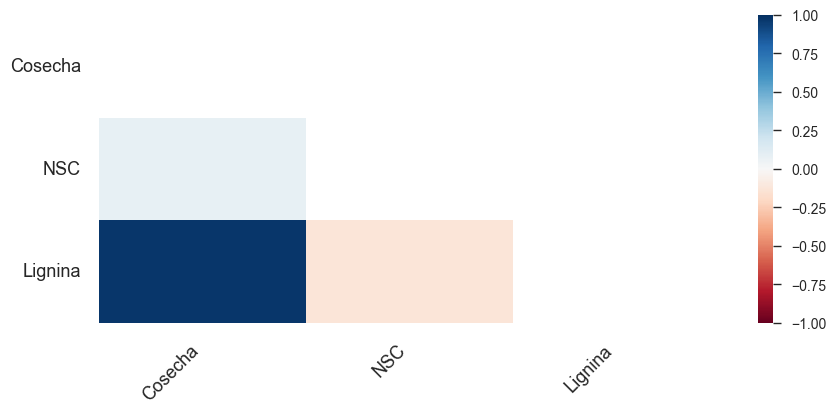

In [55]:
profile = ProfileReport(df_plantas, title="Reporte de plantas")
profile.to_notebook_iframe()
profile.to_file("Plantas.html")

<h5>2.2. Solución de problema de validez</h5>

Decidimos eliminar 'No' y ya que funciona como identificador y es posible que afecten el modelo final.

In [57]:
df_plantas.drop(['No'], axis=1, inplace=True)
print(">> Se observan los nuevos datos, siendo todos numéricos:\n")
df_plantas.info()

>> Se observan los nuevos datos, siendo todos numéricos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cosecha             727 non-null    float64
 1   Tiempo              1207 non-null   int64  
 2   Evento              1207 non-null   int64  
 3   Lignina             713 non-null    float64
 4   AMF_Imp             1207 non-null   float64
 5   PHN_Imp             1207 non-null   float64
 6   NSC_Imp             1207 non-null   float64
 7   LIG_Imp             1207 non-null   float64
 8   Luz_Alta            1207 non-null   bool   
 9   Luz_Baja            1207 non-null   bool   
 10  Microbio_Combinado  1207 non-null   bool   
 11  Microbio_Control    1207 non-null   bool   
 12  Microbio_Grande     1207 non-null   bool   
 13  Microbio_Pequeño    1207 non-null   bool   
 14  Especie_Acne        1207 non-null   bool   
 1

Corregimos Cosecha con la moda y Lignina con la media. 

In [58]:
 # Reemplazar valores faltantes en 'Cosecha' con la moda
cosecha_moda = df_plantas['Cosecha'].mode()[0]  # Calcula la moda de 'Cosecha'
df_plantas['Cosecha'] = df_plantas['Cosecha'].fillna(cosecha_moda)

# Reemplazar valores faltantes en 'Lignina' con la media
lignina_media = df_plantas['Lignina'].mean()  # Calcula la media de 'Lignina'
df_plantas['Lignina'] = df_plantas['Lignina'].fillna(lignina_media)


Se sabe también que existen valores en la columna LIG_Imp que son atípicos, los cuales no deben ser incluídos en  el análisis.

In [59]:
# Filtrar los valores que son menores o iguales a 100 en la columna 'LIG_Imp'
df_plantas_filtrado = df_plantas[df_plantas['LIG_Imp'] <= 100]


<h5>2.3. Solución de problema de completitud</h5>

Habiendo eliminado datos inválidos se procede a ver el porcentaje de los datos faltantes para tomar decisiones.

In [60]:
print(">> Los porcentajes de valores nulos en cada columna son los siguientes: ")
(df_plantas.isnull().sum()/df_dim[0]*100).sort_values(ascending=False)

>> Los porcentajes de valores nulos en cada columna son los siguientes: 


Cosecha               0.0
Luz_Baja              0.0
Especie_Acru          0.0
Especie_Acne          0.0
Microbio_Pequeño      0.0
Microbio_Grande       0.0
Microbio_Control      0.0
Microbio_Combinado    0.0
Luz_Alta              0.0
Tiempo                0.0
LIG_Imp               0.0
NSC_Imp               0.0
PHN_Imp               0.0
AMF_Imp               0.0
Lignina               0.0
Evento                0.0
Especie_Acsa          0.0
dtype: float64

<h5>2.4. Solución de problema de unicidad</h5>

Ya que no se encontraron duplicados se prosigue con el análisis.

Se preparan los datos que se van a usar en el modelamiento.

<strong><h4>3. Modelamiento</h4></strong>

Viendo el significado de las columnas, sus relaciones y teniendo como norte el perfilamiento en grupos homogéneos, con características y comportamientos similares, su consideran las siguientes columnas como prioridad para el perfilamiento inicial:

<ul>
<li>Luz</li>
<li>Evento</li>
    Lignina
    AMF_imp
</ul>